In [26]:
# Generate Dummy Data for COSC_491

In [2]:
# Setup
import mysql.connector
import pandas as pd
from faker import Faker
import random
import datetime

fake = Faker()
Faker.seed(0)
random.seed(0)

In [3]:
# Connect to MySQL
# Connect to server
cnx = mysql.connector.connect(
    host = "spock.cs.colgate.edu",
    port = 3306,
    user = "abannister",
    password = "Colgate13!",
    database = "COSC_491"
)

# Get a cursor
cur = cnx.cursor()

# Execute a query
cur.execute("SELECT CURDATE()")

# Fetch one result 
row = cur.fetchone()
print("Current date is: {0}".format(row[0]))


Current date is: 2025-04-28


In [4]:
# Ugandan Names for Random Name Generator
ugandan_first_names = [
    "Adroa", "Akiki", "Alex", "Balinda", "Balondemu", "Bwanbale", "Charles", "Damba", "Daniel",
    "Denis", "Edward", "Ejau", "Emmanuel", "Felix", "Francis", "Fred", "Gabriel", "Galabba", "Geoffrey", 
    "Achen", "Amaru", "Apio", "Atieno", "Akello", "Baraka", "Bukenya", "Kemigisha", "George", "William",
    "Kintu", "Laker", "Mukasa", "Nalubega", "Namazzi", "Nansubuga", "Okello", "Opio", "Tumusiime",
    "Abbo", "Abothi", "Alice", "Ekellot", "Eunice", "Fatuma", "Florence", "Hope", "Joan", "Kabornero", "Kibibi"
]

ugandan_last_names = [
    "Akello", "Mbabazi", "Apio", "Asiimwe", "Auma", "Biira", "Opio", "Tumusiime", "Birungi", "Muhindo",
    "Odongo", "Kiiza", "Adong", "Nabwire", "Byaruhanga", "Natukunda", "Kato", "Naigaga", "Ojok", "Byamukama",
    "Masika", "Katushabe", "Otim", "Matovu", "Mbambu", "Musinguzi", "Lubega", "Nakato", "Bako", "Mutesi", "Waiswa",
    "Adoch", "Baluku", "Bamwine", "Kagimu", "Kalenzi", "Kato", "Kyambadde", "Mugisha",
    "Muwonge", "Nabirye", "Namaganda", "Okello", "Owor", "Sserunjogi", "Tumukunde", "Wabwire"
]

NUM_PATIENTS = 100

In [5]:
# Ugandan Parishes and Villages
parishes = [
    "Kitega", "Kandama", "Kapteka", "Busaiga", "Katebe", "Sungora", "Rukono", "Acede", "Kati", "Munteme",
    "Bubetsye", "Kihyo", "Aloet", "Oding", "Kyebando", "Kirama", "Ishara", "Kisenye", "Meeru", "Masaba",
    "Kakayo", "Bwenzi", "Muyebe", "Kabira", "Bukibonga", "Katoomi", "Nabweya", "Kasonga", "Wabogalo", "Naguru"
]
NUM_PARISHES = len(parishes)

villages = [
    "Boroboro", "Kitega", "Bunseru", "Nyalit", "Wanka", "Kigando", "Loch", "Cheringany", "Kihyo", "Tomto",
    "Akokowo", "Surumoyo", "Chemugun", "Muryamat", "Sungora", "Kikonge B", "Kalyango", "Waobienne", "Abia", "Pabit",
    "Kyakayonga", "Nyai", "Labongogur", "Tubana", "Rukungiri", "Namabasa IV Lower", "Atede", "Kirama A", "Lunyerere", "Buluza"
]
NUM_VILLAGES = len(villages)

"AIDS/HIV", "Cough or Cold (no pneumonia)", "Diarrhea - Acute", "Diarrhea - Persistent", "Intestinal worms", "Leprosy", "Malaria (not during pregnancy)", "Malaria (during pregnancy)", "Meningitis (Non meningococcal)", "Onchocerciasis", "Pelvic Inflammatory Disease", "Pneumonia", "Schistosomiasis", "Sleeping Sickness", "STI", "Tetanus (over 28 days ago)", "Typhoid Fever", "Urinary Tract Infctions (UTI)"

In [6]:
disease_dict = {
    "reportable": ["Acute flaccid paralysis", "Cholera", "Dysentery", "Guinea worm", "Hemorrhagic fever", "Measles", "Meningitis (Meningococcal)", "Plague", "Rabies", "Tetanus (0-28 days)", "Yellow Fever"],
    "tuberculosis": ["New TB Diagnosis", "Known TB Patient"],
    "infectious": ["AIDS/HIV", "Cough or Cold (no pneumonia)", "Diarrhea - Acute", "Diarrhea - Persistent", "Intestinal worms", "Leprosy", "Malaria (not during pregnancy)", "Malaria (during pregnancy)", 
                            "Meningitis (Non meningococcal)", "Onchocerciasis", "Pelvic Inflammatory Disease", "Pneumonia", "Schistosomiasis", "Sleeping Sickness", "STI", "Tetanus (over 28 days ago)", "Typhoid Fever", "Urinary Tract Infctions (UTI)"],
    "noninfectious": ["Alcohol and drug abuse", "Anaemia", "Animal and Snake bites", "Asthma", "Cardiovascular - High BP", "Cardiovascular - Other", "Childhood mental disorder", "Diabetes Mellitus", "Epilepsy", 
                                "GI disorders (non infectious)", "Injuries - Road Traffic Accident", "Injuries - Trauma of other origin", "Malnutrition - low weight for age", "Malnutrition - severe", "Mental Illness - Anxiety", 
                                "Mental Illness - Depression", "Mental Illness - Mania", "Mental Illness - Schizophrenia", "Mental Illness - Other"],
    "maternal_perinatal": ["Abortions", "Haemorrhage during pregnancy", "High BP during pregnancy", "Obstructed labour", "Perinatal conditions in newborns"],
    "miscellaneous": ["Death in OPD (no diagnosis)", "ENT conditions", "Eye conditions", "Skin conditions", "Oral diseases and conditions", "Diagnosis unclear"],
    "cough": ["Acute Bronchitis/LRTI (not pneumonia)", "Allergic Rhinitis", "COPD", "Heartburn"]
}
NUM_DISEASES = len(disease_dict)

In [7]:
# vaccines
vaccinations = ["BCG", "Polio", "DPT-HepB-Hib", "Measles", "Tetanus (Td)", "Pneumococcal (PCV)", "Rotavirus", "Yellow Fever", "Other:"]
NUM_VACCINES = len(vaccinations)

In [8]:
# SQL INSERT Statements for Diseases
insert_statements = []
id_counter = 1

for category, diseases in disease_dict.items():
    for disease in diseases:
        sql = f"INSERT INTO diseases (id, name, disease_type) VALUES ({id_counter}, \"{disease}\", \"{category}\");"
        insert_statements.append(sql)
        id_counter += 1

# Output the SQL Statement
for stmt in insert_statements:
    print(stmt)
    cur.execute(stmt)

cnx.commit()

INSERT INTO diseases (id, name, disease_type) VALUES (1, "Acute flaccid paralysis", "reportable");


IntegrityError: 1062 (23000): Duplicate entry '1' for key 'diseases.PRIMARY'

In [38]:
# SQL INSERT Statements for Vaccinations
insert_statements = []
id_counter = 1

for vaccination in vaccinations:
    sql = f"INSERT INTO vaccinations (id, name) VALUES ({id_counter}, \"{vaccination}\");"
    insert_statements.append(sql)
    id_counter += 1

# Output the SQL Statement
for stmt in insert_statements:
    print(stmt)
    cur.execute(stmt)

cnx.commit()

INSERT INTO vaccinations (id, name) VALUES (1, "BCG");
INSERT INTO vaccinations (id, name) VALUES (2, "Polio");
INSERT INTO vaccinations (id, name) VALUES (3, "DPT-HepB-Hib");
INSERT INTO vaccinations (id, name) VALUES (4, "Measles");
INSERT INTO vaccinations (id, name) VALUES (5, "Tetanus (Td)");
INSERT INTO vaccinations (id, name) VALUES (6, "Pneumococcal (PCV)");
INSERT INTO vaccinations (id, name) VALUES (7, "Rotavirus");
INSERT INTO vaccinations (id, name) VALUES (8, "Yellow Fever");
INSERT INTO vaccinations (id, name) VALUES (9, "Other:");


In [39]:
# SQL Insert Statements for Parishes
insert_statements= []
id_counter = 1

for parish in parishes:
    sql = f"INSERT INTO parishes (id, name) VALUES ({id_counter}, \"{parish}\");"
    insert_statements.append(sql)
    id_counter += 1

# Output the SQL Statement
for stmt in insert_statements:
    print(stmt)
    cur.execute(stmt)

cnx.commit()

INSERT INTO parishes (id, name) VALUES (1, "Kitega");
INSERT INTO parishes (id, name) VALUES (2, "Kandama");
INSERT INTO parishes (id, name) VALUES (3, "Kapteka");
INSERT INTO parishes (id, name) VALUES (4, "Busaiga");
INSERT INTO parishes (id, name) VALUES (5, "Katebe");
INSERT INTO parishes (id, name) VALUES (6, "Sungora");
INSERT INTO parishes (id, name) VALUES (7, "Rukono");
INSERT INTO parishes (id, name) VALUES (8, "Acede");
INSERT INTO parishes (id, name) VALUES (9, "Kati");
INSERT INTO parishes (id, name) VALUES (10, "Munteme");
INSERT INTO parishes (id, name) VALUES (11, "Bubetsye");
INSERT INTO parishes (id, name) VALUES (12, "Kihyo");
INSERT INTO parishes (id, name) VALUES (13, "Aloet");
INSERT INTO parishes (id, name) VALUES (14, "Oding");
INSERT INTO parishes (id, name) VALUES (15, "Kyebando");
INSERT INTO parishes (id, name) VALUES (16, "Kirama");
INSERT INTO parishes (id, name) VALUES (17, "Ishara");
INSERT INTO parishes (id, name) VALUES (18, "Kisenye");
INSERT INTO par

In [40]:
# SQL Insert Statements for Villages
insert_statements= []
id_counter = 1

for village in villages:
    sql = f"INSERT INTO villages (id, name) VALUES ({id_counter}, \"{village}\");"
    insert_statements.append(sql)
    id_counter += 1

# Output the SQL Statement
for stmt in insert_statements:
    print(stmt)
    cur.execute(stmt)

cnx.commit()

INSERT INTO villages (id, name) VALUES (1, "Boroboro");
INSERT INTO villages (id, name) VALUES (2, "Kitega");
INSERT INTO villages (id, name) VALUES (3, "Bunseru");
INSERT INTO villages (id, name) VALUES (4, "Nyalit");
INSERT INTO villages (id, name) VALUES (5, "Wanka");
INSERT INTO villages (id, name) VALUES (6, "Kigando");
INSERT INTO villages (id, name) VALUES (7, "Loch");
INSERT INTO villages (id, name) VALUES (8, "Cheringany");
INSERT INTO villages (id, name) VALUES (9, "Kihyo");
INSERT INTO villages (id, name) VALUES (10, "Tomto");
INSERT INTO villages (id, name) VALUES (11, "Akokowo");
INSERT INTO villages (id, name) VALUES (12, "Surumoyo");
INSERT INTO villages (id, name) VALUES (13, "Chemugun");
INSERT INTO villages (id, name) VALUES (14, "Muryamat");
INSERT INTO villages (id, name) VALUES (15, "Sungora");
INSERT INTO villages (id, name) VALUES (16, "Kikonge B");
INSERT INTO villages (id, name) VALUES (17, "Kalyango");
INSERT INTO villages (id, name) VALUES (18, "Waobienne");


In [41]:
# List of Relationships
relationships = ['Mother', 'Father', 'Spouse', 'Friend', 'Brother', 'Sister']

In [42]:
# Emergency_Contacts
def generate_emergency_contacts():
    emergency_contacts = []
    id_counter = 1

    for _ in range(NUM_PATIENTS):
        first_name = random.choice(ugandan_first_names)
        last_name = random.choice(ugandan_last_names)
        relationship = random.choice(relationships)
        phone_num = fake.phone_number() # Generates a fake phone number
        parish_id = random.randint(1, NUM_PARISHES)
        village_id = random.randint(1, NUM_VILLAGES)

        sql = f"""INSERT INTO emergency_contacts (id, last_name, first_name, relationship, phone_num, parish_id, village_id)
VALUES ({id_counter}, '{last_name}', '{first_name}', '{relationship}', '{phone_num}', {parish_id}, {village_id});"""
        
        emergency_contacts.append(sql)
        id_counter += 1

    return emergency_contacts

sql_statements = generate_emergency_contacts()
for stmt in sql_statements:
    print(stmt)
    cur.execute(stmt)

cnx.commit()

INSERT INTO emergency_contacts (id, last_name, first_name, relationship, phone_num, parish_id, village_id)
VALUES (1, 'Lubega', 'Baraka', 'Mother', '(460)648-7647x5938', 9, 17);
INSERT INTO emergency_contacts (id, last_name, first_name, relationship, phone_num, parish_id, village_id)
VALUES (2, 'Musinguzi', 'Mukasa', 'Spouse', '(319)748-9241', 16, 12);
INSERT INTO emergency_contacts (id, last_name, first_name, relationship, phone_num, parish_id, village_id)
VALUES (3, 'Nabwire', 'Tumusiime', 'Brother', '281.256.5938x7784', 5, 10);
INSERT INTO emergency_contacts (id, last_name, first_name, relationship, phone_num, parish_id, village_id)
VALUES (4, 'Opio', 'Daniel', 'Brother', '560-597-5351', 26, 9);
INSERT INTO emergency_contacts (id, last_name, first_name, relationship, phone_num, parish_id, village_id)
VALUES (5, 'Tumukunde', 'Nansubuga', 'Brother', '328.671.1587', 29, 5);
INSERT INTO emergency_contacts (id, last_name, first_name, relationship, phone_num, parish_id, village_id)
VALUES

In [43]:
# Store patient ids (NINs) so you can access them later
patient_nins = []

# Patients
def generate_patients(n):
    patients = []

    for _ in range(n):
        nin = random.randint(100000000, 999999999)
        patient_nins.append(nin)
        first_name = random.choice(ugandan_first_names)
        last_name = random.choice(ugandan_last_names)
        parish_id = random.randint(1, NUM_PARISHES)
        village_id = random.randint(1, NUM_VILLAGES)
        dob = fake.date_of_birth(minimum_age=0, maximum_age=132).isoformat()
        sex = random.choice(['male', 'female'])
        emergency_contact_id = random.randint(1, n)
        consent = True

        sql = f"""INSERT INTO patients (nin, last_name, first_name, parish_id, village_id, dob, sex, emergency_contact_id, consent)
VALUES ({nin}, '{last_name}', '{first_name}', {parish_id}, {village_id}, '{dob}', '{sex}', {emergency_contact_id}, {int(consent)});"""
        patients.append(sql)

    return patients

sql_statements = generate_patients(n=100)
for stmt in sql_statements:
    print(stmt)
    cur.execute(stmt)

cnx.commit()

INSERT INTO patients (nin, last_name, first_name, parish_id, village_id, dob, sex, emergency_contact_id, consent)
VALUES (581620759, 'Kyambadde', 'Mukasa', 23, 22, '2011-01-18', 'male', 55, 1);
INSERT INTO patients (nin, last_name, first_name, parish_id, village_id, dob, sex, emergency_contact_id, consent)
VALUES (189832726, 'Byaruhanga', 'Akello', 9, 19, '2013-06-01', 'male', 56, 1);
INSERT INTO patients (nin, last_name, first_name, parish_id, village_id, dob, sex, emergency_contact_id, consent)
VALUES (306099391, 'Tumusiime', 'Atieno', 3, 27, '1986-02-09', 'male', 68, 1);
INSERT INTO patients (nin, last_name, first_name, parish_id, village_id, dob, sex, emergency_contact_id, consent)
VALUES (584914466, 'Owor', 'Kibibi', 7, 4, '1987-07-27', 'female', 51, 1);
INSERT INTO patients (nin, last_name, first_name, parish_id, village_id, dob, sex, emergency_contact_id, consent)
VALUES (375392952, 'Namaganda', 'Felix', 2, 26, '1988-07-16', 'male', 80, 1);
INSERT INTO patients (nin, last_name, 

In [44]:
# Disease_Patients
def generate_disease_patient_table(patient_nins):
    joins = []
    id_counter = 1
    for nin in patient_nins:
        num_diseases_for_patient = random.randint(1, 5)  # Each patient has between 1 to 5 diseases
        disease_ids = random.sample(range(1, NUM_DISEASES + 1), num_diseases_for_patient)
        
        for disease_id in disease_ids:
            first_date = fake.date_between(start_date='-10y', end_date='-1w')
            last_date = fake.date_between(start_date=first_date, end_date='today')
            sql = f"""INSERT INTO diseases_patients (id, patient_id, disease_id, first_reported_date, last_confirmed_date)
VALUES ({id_counter}, {nin}, {disease_id}, '{first_date}', '{last_date}');"""
            
            joins.append(sql)
            id_counter += 1
    return joins

sql_statements = generate_disease_patient_table(patient_nins)
for stmt in sql_statements:
    print(stmt)
    cur.execute(stmt)

cnx.commit()

INSERT INTO diseases_patients (id, patient_id, disease_id, first_reported_date, last_confirmed_date)
VALUES (1, 581620759, 5, '2015-07-31', '2020-08-05');
INSERT INTO diseases_patients (id, patient_id, disease_id, first_reported_date, last_confirmed_date)
VALUES (2, 581620759, 7, '2023-08-27', '2023-10-14');
INSERT INTO diseases_patients (id, patient_id, disease_id, first_reported_date, last_confirmed_date)
VALUES (3, 581620759, 2, '2018-11-18', '2019-07-07');
INSERT INTO diseases_patients (id, patient_id, disease_id, first_reported_date, last_confirmed_date)
VALUES (4, 189832726, 7, '2024-12-18', '2025-01-06');
INSERT INTO diseases_patients (id, patient_id, disease_id, first_reported_date, last_confirmed_date)
VALUES (5, 189832726, 4, '2020-06-16', '2024-05-10');
INSERT INTO diseases_patients (id, patient_id, disease_id, first_reported_date, last_confirmed_date)
VALUES (6, 189832726, 5, '2024-11-18', '2024-11-18');
INSERT INTO diseases_patients (id, patient_id, disease_id, first_repor

In [46]:
# Vaccinations_Patients
def generate_vaccinations_patient_table(patient_nins):
    joins = []
    id_counter = 1
    for nin in patient_nins:
        num_vaccines_for_patient = random.randint(0, 8) # Each patient has between 0 and 8 vaccines
        vaccination_ids = random.sample(range(1, NUM_VACCINES + 1), num_vaccines_for_patient)
        for vaccination_id in vaccination_ids:
            first_date = fake.date_between(start_date='-10y', end_date='-1w')
            last_date = fake.date_between(start_date=first_date, end_date='today')
            sql = f"""INSERT INTO vaccinations_patients (id, patient_id, vaccination_id, first_reported_date, last_confirmed_date)
VALUES ({id_counter}, {nin}, {vaccination_id}, '{first_date}', '{last_date}');"""
            joins.append(sql)
            id_counter += 1
    return joins

sql_statements = generate_vaccinations_patient_table(patient_nins)
for stmt in sql_statements:
    print(stmt)
    cur.execute(stmt)

cnx.commit()

INSERT INTO vaccinations_patients (id, patient_id, vaccination_id, first_reported_date, last_confirmed_date)
VALUES (1, 581620759, 9, '2017-11-30', '2023-02-20');
INSERT INTO vaccinations_patients (id, patient_id, vaccination_id, first_reported_date, last_confirmed_date)
VALUES (2, 581620759, 6, '2023-06-06', '2024-08-29');
INSERT INTO vaccinations_patients (id, patient_id, vaccination_id, first_reported_date, last_confirmed_date)
VALUES (3, 581620759, 1, '2019-08-27', '2021-06-22');
INSERT INTO vaccinations_patients (id, patient_id, vaccination_id, first_reported_date, last_confirmed_date)
VALUES (4, 581620759, 7, '2022-06-30', '2023-01-13');
INSERT INTO vaccinations_patients (id, patient_id, vaccination_id, first_reported_date, last_confirmed_date)
VALUES (5, 581620759, 3, '2019-05-25', '2024-11-23');
INSERT INTO vaccinations_patients (id, patient_id, vaccination_id, first_reported_date, last_confirmed_date)
VALUES (6, 189832726, 4, '2024-11-26', '2024-12-14');
INSERT INTO vaccinatio

In [53]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 9.3 MB/s eta 0:00:00:00:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Count the number of patients per parish_id

query = """
SELECT COUNT(nin), parish_id FROM patients
GROUP BY parish_id
ORDER BY COUNT(nin) DESC;
"""

df = pd.read_sql(query, cnx)
print(df)

/var/folders/7v/7jsp7n8s1511br5cmg8xpd5h0000gn/T/ipykernel_7726/3454704825.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


    COUNT(nin)  parish_id
0            8          3
1            8         23
2            8         12
3            6         29
4            5          2
5            5         10
6            5          6
7            5          4
8            4         28
9            4         11
10           4         26
11           4         14
12           4         15
13           4         16
14           4         17
15           4         18
16           3          1
17           3         22
18           3          9
19           2         20
20           2         21
21           1         19
22           1         13
23           1          5
24           1         27
25           1          7


   ParishName  NumberOfPatients
0     Kapteka                 8
1      Muyebe                 8
2       Kihyo                 8
3    Wabogalo                 6
4     Kandama                 5
5     Munteme                 5
6     Sungora                 5
7     Busaiga                 5
8     Kasonga                 4
9    Bubetsye                 4
10    Katoomi                 4
11      Oding                 4
12   Kyebando                 4
13     Kirama                 4
14     Ishara                 4
15    Kisenye                 4
16     Kitega                 3
17     Bwenzi                 3
18       Kati                 3
19     Masaba                 2
20     Kakayo                 2
21      Meeru                 1
22      Aloet                 1
23     Katebe                 1
24    Nabweya                 1
25     Rukono                 1


/var/folders/7v/7jsp7n8s1511br5cmg8xpd5h0000gn/T/ipykernel_7726/2048324556.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


Text(0.5, 1.0, 'Number of Patients per Village')

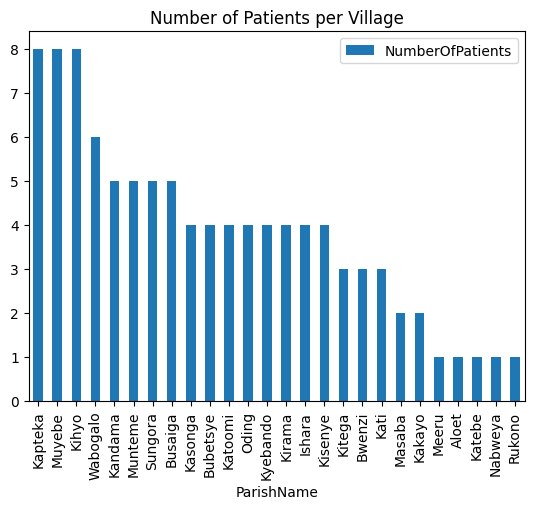

In [ ]:
# Count the number of patients by parish name
query = """
SELECT parishes.name AS ParishName, COUNT(patients.nin) AS NumberOfPatients FROM patients
LEFT JOIN parishes ON patients.parish_id = parishes.id
GROUP BY parish_id
ORDER BY COUNT(parish_id) DESC;
"""

df = pd.read_sql(query, cnx)
print(df)

df.plot(kind = 'bar', x = 'ParishName', y = 'NumberOfPatients')
plt.title("Number of Patients per Village")

                      disease  num_patients
0                     Measles            47
1                   Dysentery            46
2           Hemorrhagic fever            42
3  Meningitis (Meningococcal)            42
4     Acute flaccid paralysis            40
5                     Cholera            40
6                 Guinea worm            35


/var/folders/7v/7jsp7n8s1511br5cmg8xpd5h0000gn/T/ipykernel_7726/3746689403.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


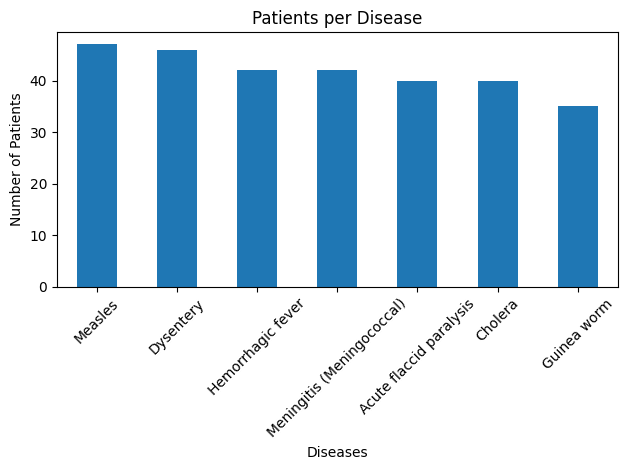

In [ ]:
# Count and show the number of patients per disease

query = """
SELECT d.name AS disease, COUNT(DISTINCT dp.patient_id) AS num_patients FROM diseases d
INNER JOIN diseases_patients dp ON d.id = dp.disease_id
GROUP BY d.id, d.name
ORDER BY num_patients DESC;
"""

df = pd.read_sql(query, cnx)
print(df)

# Plot
df.plot(kind='bar', x='disease', y='num_patients', legend=False)
plt.ylabel("Number of Patients")
plt.xlabel("Diseases")
plt.title("Patients per Disease")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/7v/7jsp7n8s1511br5cmg8xpd5h0000gn/T/ipykernel_7726/1419339172.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


                       disease  gender  num_patients
0      Acute flaccid paralysis    male            20
1      Acute flaccid paralysis  female            20
2                      Cholera    male            18
3                      Cholera  female            22
4                    Dysentery    male            20
5                    Dysentery  female            26
6                  Guinea worm    male            17
7                  Guinea worm  female            18
8            Hemorrhagic fever    male            24
9            Hemorrhagic fever  female            18
10                     Measles    male            21
11                     Measles  female            26
12  Meningitis (Meningococcal)    male            18
13  Meningitis (Meningococcal)  female            24


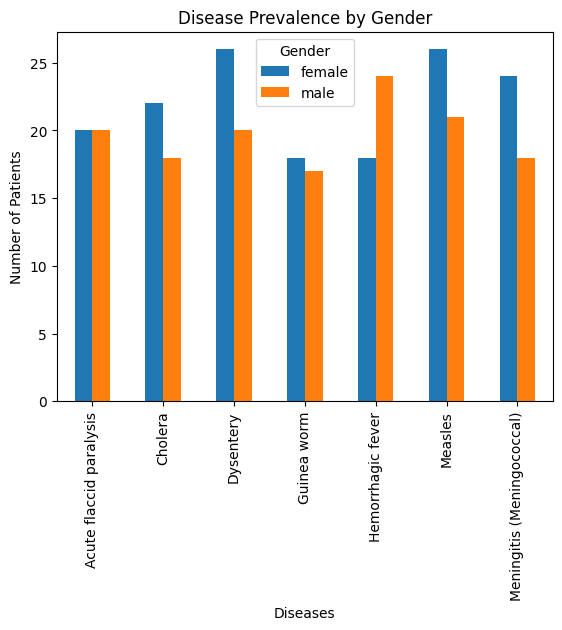

In [ ]:
# Nested bar graph of patients per disease divided by gender

query = """
SELECT d.name AS disease, p.sex AS gender, COUNT(DISTINCT p.nin) AS num_patients FROM diseases d
INNER JOIN diseases_patients dp ON d.id = dp.disease_id
INNER JOIN patients p ON dp.patient_id = p.nin
GROUP BY d.name, p.sex
"""

df = pd.read_sql(query, cnx)
print(df)

pivot = df.pivot(index='disease', columns='gender', values='num_patients')
pivot.plot(kind = 'bar')
plt.title("Disease Prevalence by Gender")
plt.ylabel("Number of Patients")
plt.xlabel("Diseases")
plt.legend(title="Gender")
plt.show()

/var/folders/7v/7jsp7n8s1511br5cmg8xpd5h0000gn/T/ipykernel_7726/2066361543.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


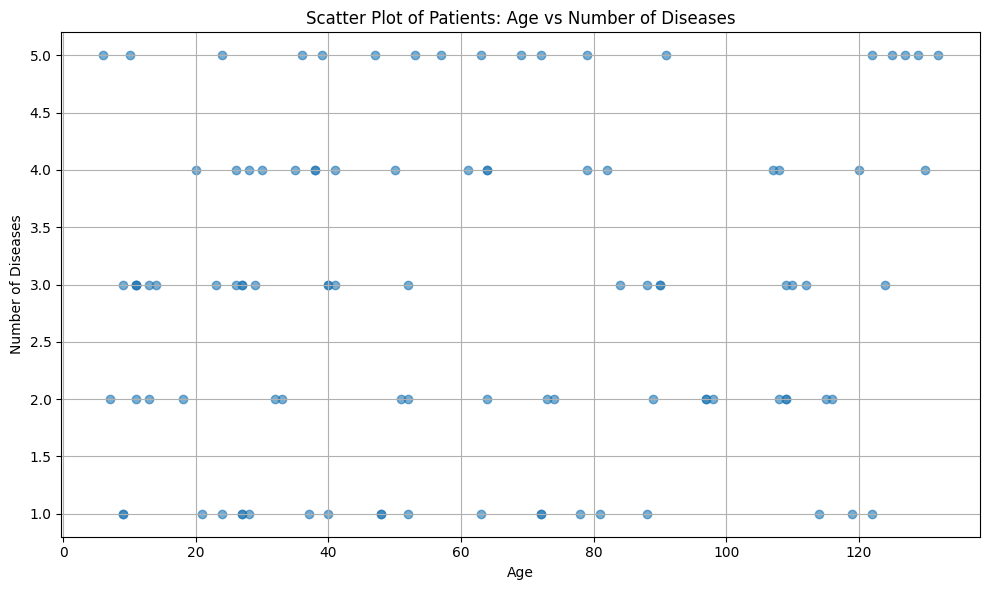

In [16]:
# Scatter plot of patients by number of diseases and age

query = """
WITH disease_counts AS (
    SELECT 
        patient_id, 
        COUNT(disease_id) AS num_diseases
    FROM diseases_patients
    GROUP BY patient_id
)
SELECT 
    p.nin AS patient_id,
    TIMESTAMPDIFF(YEAR, p.dob, CURDATE()) AS age,
    COALESCE(dc.num_diseases, 0) AS num_diseases
FROM 
    patients p
LEFT JOIN 
    disease_counts dc ON p.nin = dc.patient_id;
"""

df = pd.read_sql(query, cnx)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['num_diseases'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Number of Diseases')
plt.title('Scatter Plot of Patients: Age vs Number of Diseases')
plt.grid(True)
plt.tight_layout()
plt.show()


   num_diseases  num_patients
0             1            21
1             2            20
2             3            23
3             4            18
4             5            18


/var/folders/7v/7jsp7n8s1511br5cmg8xpd5h0000gn/T/ipykernel_7726/1911159700.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


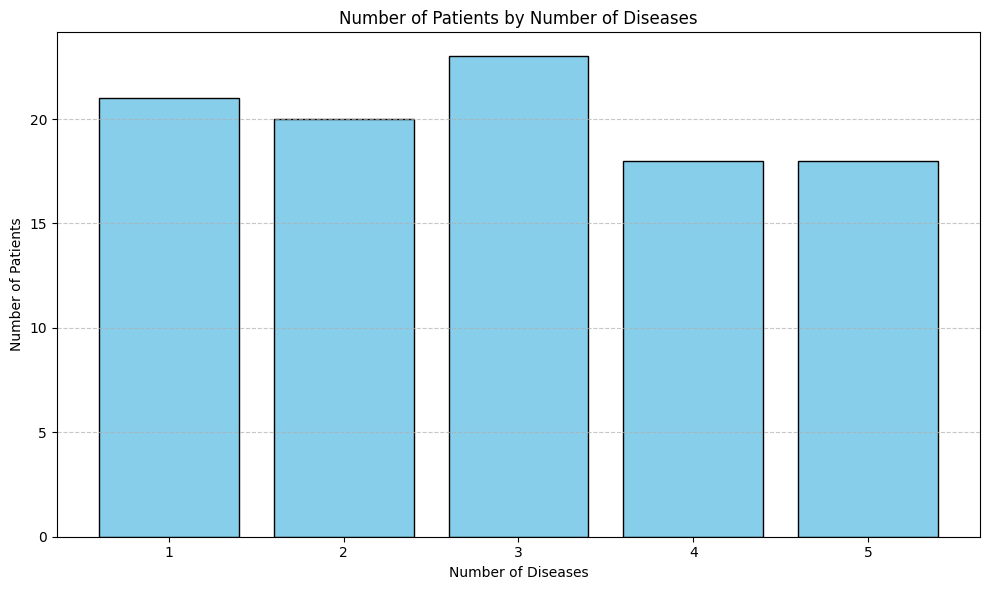

In [19]:
# Diseases per Patient

query = """ 
SELECT num_diseases, COUNT(*) AS num_patients
FROM (
    SELECT patient_id, COUNT(disease_id) AS num_diseases
    FROM diseases_patients
    GROUP BY patient_id
) sub
GROUP BY num_diseases
ORDER BY num_diseases;
"""
df = pd.read_sql(query, cnx)
print(df)

plt.figure(figsize=(10,6))
plt.bar(df['num_diseases'], df['num_patients'], color='skyblue', edgecolor='black')
plt.xlabel('Number of Diseases')
plt.ylabel('Number of Patients')
plt.title('Number of Patients by Number of Diseases')
plt.xticks(df['num_diseases'])  # set exact disease counts on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/7v/7jsp7n8s1511br5cmg8xpd5h0000gn/T/ipykernel_7726/1318919537.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


   age_group  num_diseases  num_patients
0       0-17             1             2
1       0-17             2             3
2       0-17             3             6
3       0-17             5             2
4      18-35             1             5
5      18-35             2             3
6      18-35             3             5
7      18-35             4             5
8      18-35             5             1
9      36-60             1             5
10     36-60             2             2
11     36-60             3             4
12     36-60             4             4
13     36-60             5             5
14       61+             1             9
15       61+             2            12
16       61+             3             8
17       61+             4             9
18       61+             5            10


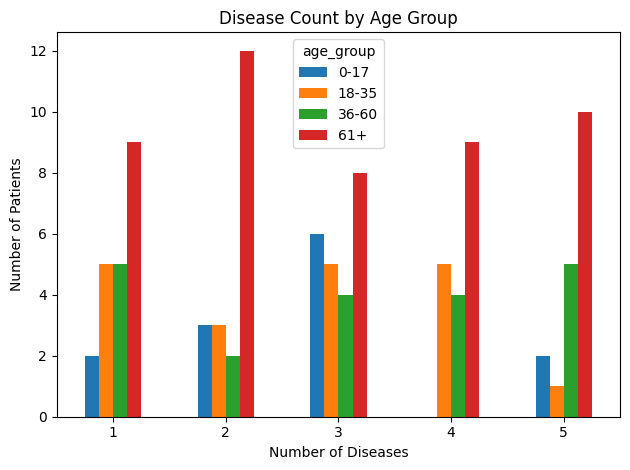

In [20]:
query = """ 
SELECT age_group, num_diseases, COUNT(*) AS num_patients
FROM (
    SELECT 
        CASE
            WHEN TIMESTAMPDIFF(YEAR, p.dob, CURDATE()) BETWEEN 0 AND 17 THEN '0-17'
            WHEN TIMESTAMPDIFF(YEAR, p.dob, CURDATE()) BETWEEN 18 AND 35 THEN '18-35'
            WHEN TIMESTAMPDIFF(YEAR, p.dob, CURDATE()) BETWEEN 36 AND 60 THEN '36-60'
            ELSE '61+'
        END AS age_group,
        COUNT(dp.disease_id) AS num_diseases
    FROM 
        diseases_patients dp
    JOIN 
        patients p ON dp.patient_id = p.nin
    GROUP BY 
        age_group, dp.patient_id
) AS age_disease_counts
GROUP BY age_group, num_diseases
ORDER BY age_group, num_diseases; 
"""

df = pd.read_sql(query, cnx)
print(df)

# Optional: Pivot for easier plotting
pivot = df.pivot(index='num_diseases', columns='age_group', values='num_patients').fillna(0)

pivot.plot(kind='bar')
plt.ylabel("Number of Patients")
plt.xlabel("Number of Diseases")
plt.title("Disease Count by Age Group")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [47]:
# Close connection
cur.close()
cnx.close()